In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df_income = pd.read_csv("https://raw.githubusercontent.com/artamonoff/econometrica/main/econometrica-1/datasets/Electricity.csv")
df_income

,cost,q,pl,sl,pk,sk,pf,sf
0,0.2130,8.0,6869.47,0.3291,64.945,0.4197,18.000,0.2512
1,3.0427,869.0,8372.96,0.1030,68.227,0.2913,21.067,0.6057
2,9.4059,1412.0,7960.90,0.0891,40.692,0.1567,41.530,0.7542
3,0.7606,65.0,8971.89,0.2802,41.243,0.1282,28.539,0.5916
4,2.2587,295.0,8218.40,0.1772,71.940,0.1623,39.200,0.6606
...,...,...,...,...,...,...,...,...
153,6.8293,946.6,10642.16,0.0883,43.600,0.1914,51.463,0.7203
154,3.7605,377.0,7432.24,0.2117,74.120,0.2274,33.436,0.5609
155,3.9822,391.0,5826.04,0.1926,78.288,0.0924,44.633,0.7151
156,30.1880,5317.0,9586.63,0.0845,78.008,0.2009,41.840,0.7147


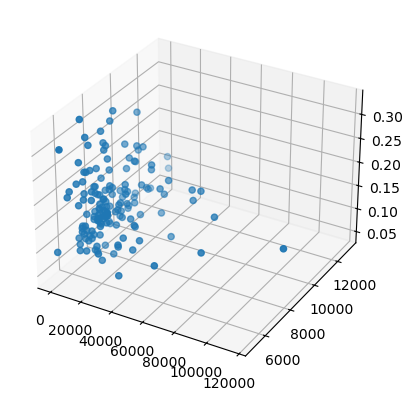

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter (xs = 'q', ys = 'pl',zs = 'sl', data = df_income)
plt.show()

In [4]:
fitted_plane = smf.ols(formula= 'pl ~ q + np.sin(sl)', data=df_income).fit()

In [5]:
fitted_plane.params

Intercept     7623.723344
q                0.007039
np.sin(sl)    2201.488658
dtype: float64

In [6]:
beta0, beta1, beta2 = fitted_plane.params

In [7]:
X= np.arange(start = df_income ['q'].min(), stop = df_income['q'].max(), step=1)
Y= np.arange(start = df_income ['sl'].min(), stop = df_income ['sl'].max(), step=1)
X,Y = np.meshgrid(X,Y)

In [8]:
Z = beta0 + beta1 * X+ beta2 * Y

<function matplotlib.pyplot.show(close=None, block=None)>

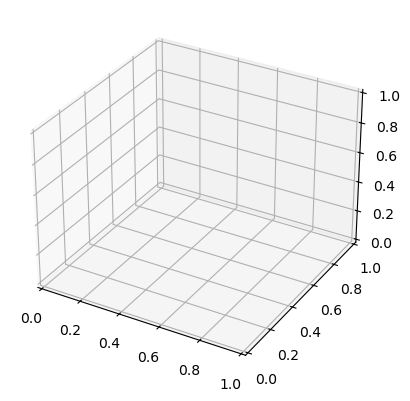

In [9]:
fig.ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(X,Y,Z, color = 'r', alpha = 0.2)
ax.scatter (zs = 'sl', xs = 'q', ys = 'pl', data = df_income)
plt.show